In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool

from subprocess import check_output
data = pd.read_csv('../Pokemon Combat Prediction/pokemon.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
#             800 non-null int64
Name          799 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(8), object(3)
memory usage: 69.6+ KB


In [2]:
data.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


Delete first column which contain row number

In [3]:
del data['#']
data.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [7]:
data.columns

Index(['Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

# MATPLOTLIB
Matplot is a python library that help us to plot data. The easiest and basic plots are line, scatter and histogram plots.

- **Line plot** is better when x axis is time.
- **Scatter** is better when there is correlation between two variables
- **Histogram** is better when we need to see distribution of numerical data.
- Customization: Colors,labels,thickness of line, title, opacity, grid, figsize, ticks of axis and linestyle

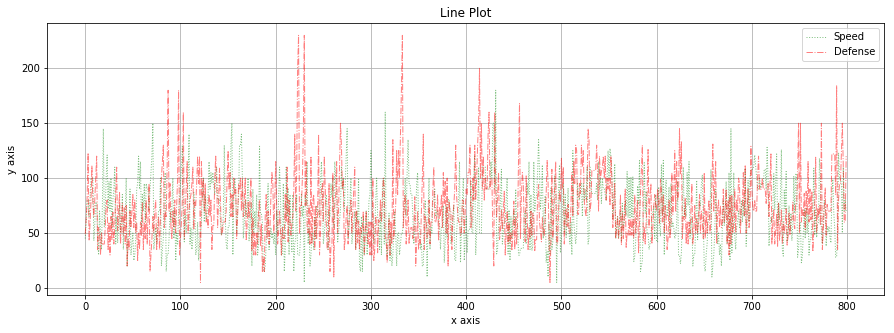

In [13]:
# Line Plot
# color = color, label = label, linewidth = width of line, alpha = opacity, grid = grid, linestyle = sytle of line
data.Speed.plot(kind = 'line', color = 'g',label = 'Speed',linewidth=1,alpha = 0.5,grid = True,linestyle = ':', figsize=(15, 5))
data.Defense.plot(color = 'r',label = 'Defense',linewidth=1, alpha = 0.5,grid = True,linestyle = '-.')
plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('x axis')              # label = name of label
plt.ylabel('y axis')
plt.title('Line Plot')            # title = title of plot
plt.show()

Text(0.5,1,'Attack Defense Scatter Plot')

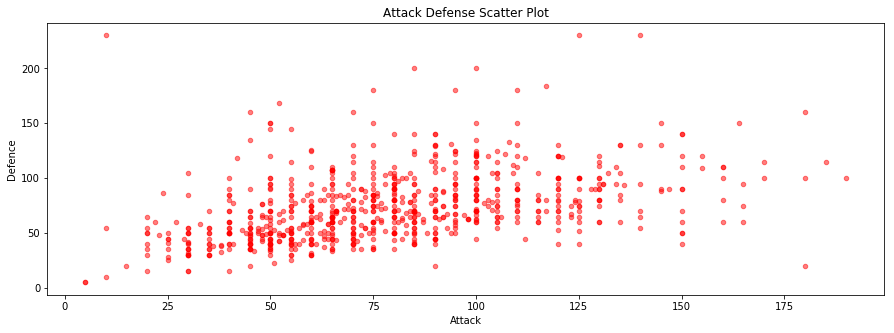

In [15]:
# Scatter Plot 
# x = attack, y = defense
data.plot(kind='scatter', x='Attack', y='Defense',alpha = 0.5,color = 'red', figsize=(15, 5))
plt.xlabel('Attack')              # label = name of label
plt.ylabel('Defence')
plt.title('Attack Defense Scatter Plot')            # title = title of plot

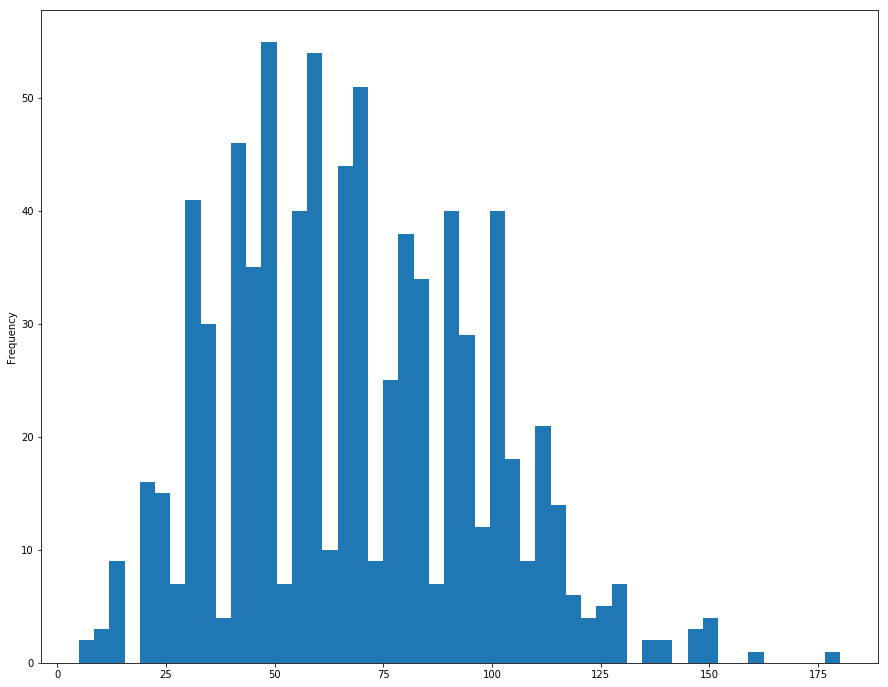

In [17]:
# Histogram
# bins = number of bar in figure
data.Speed.plot(kind = 'hist',bins = 50,figsize = (15,12))
plt.show()

# PANDAS
What we need to know about pandas?

In [18]:
series = data['Defense']        # data['Defense'] = series
print(type(series))
data_frame = data[['Defense']]  # data[['Defense']] = data frame
print(type(data_frame))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [19]:
# 1 - Filtering Pandas data frame
x = data['Defense']>200     # There are only 3 pokemons who have higher defense value than 200
data[x]

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
230,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False
333,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False


In [25]:
x = data['Speed']>140     # There are only 3 pokemons who have higher defense value than 200
data[x]

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
19,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,1,False
71,Mega Alakazam,Psychic,NaN,55,50,65,175,95,150,1,False
154,Mega Aerodactyl,Rock,Flying,80,135,85,70,95,150,1,False
275,Mega Sceptile,Grass,Dragon,70,110,75,145,85,145,3,False
315,Ninjask,Bug,Flying,61,90,45,50,50,160,3,False
428,Deoxys Normal Forme,Psychic,NaN,50,150,50,150,50,150,3,True
429,DeoxysAttack Forme,Psychic,NaN,50,180,20,180,20,150,3,True
431,Deoxys Speed Forme,Psychic,NaN,50,95,90,95,90,180,3,True
678,Accelgor,Bug,NaN,80,70,40,100,60,145,5,False


In [26]:
# 2 - Filtering pandas with logical_and
# There are only 2 pokemons who have higher defence value than 2oo and higher attack value than 100
data[np.logical_and(data['Defense']>200, data['Attack']>100 )]

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
333,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False


In [27]:
data[np.logical_and(data['Defense']>150, data['Attack']>150 )]

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
424,Primal Groudon,Ground,Fire,100,180,160,150,90,90,3,True


In [28]:
# For example lets look frequency of pokemom types
print(data['Type 1'].value_counts(dropna =False))  # if there are nan values that also be counted
# As it can be seen below there are 112 water pokemon or 70 grass pokemon

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Ghost        32
Ground       32
Dragon       32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64


In [29]:
print(data['Legendary'].value_counts(dropna =False))

False    735
True      65
Name: Legendary, dtype: int64


In [30]:
# For example max HP is 255 or min defense is 5
data.describe() #ignore null entries

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [31]:
data_new = data.head()    # Only take 5 rows into new data
data_new

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [33]:
data.loc[data['Name'] == 'Pikachu']

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
30,Pikachu,Electric,NaN,35,55,40,50,50,90,1,False


In [34]:
# lets melt
# id_vars = what we do not wish to melt
# value_vars = what we want to melt
melted = pd.melt(frame=data_new,id_vars = 'Name', value_vars= ['Attack','Defense'])
melted

,Name,variable,value
0,Bulbasaur,Attack,49
1,Ivysaur,Attack,62
2,Venusaur,Attack,82
3,Mega Venusaur,Attack,100
4,Charmander,Attack,52
5,Bulbasaur,Defense,49
6,Ivysaur,Defense,63
7,Venusaur,Defense,83
8,Mega Venusaur,Defense,123
9,Charmander,Defense,43


In [35]:
data.loc[data['Name'] == 'Charmander']

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


# PIVOTING DATA
Reverse of melting.

In [36]:
# Index is name
# I want to make that columns are variable
# Finally values in columns are value
melted.pivot(index = 'Name', columns = 'variable',values='value')

variable,Attack,Defense
Name,,
Bulbasaur,49,49
Charmander,52,43
Ivysaur,62,63
Mega Venusaur,100,123
Venusaur,82,83


# CONCATENATING DATA
We can concatenate two dataframe

In [37]:
# Firstly lets create 2 data frame
data1 = data.head()
data2= data.tail()
conc_data_row = pd.concat([data1,data2],axis =0,ignore_index =True) # axis = 0 : adds dataframes in row
conc_data_row

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
6,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
7,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
8,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
9,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


In [38]:
data1 = data['Attack'].head()
data2= data['Defense'].head()
conc_data_col = pd.concat([data1,data2],axis =1) # axis = 0 : adds dataframes in row
conc_data_col

,Attack,Defense
0,49,49
1,62,63
2,82,83
3,100,123
4,52,43


# MISSING DATA and TESTING WITH ASSERT
If we encounter with missing data, what we can do:
- leave as is
- drop them with dropna()
- fill missing value with fillna()
- fill missing values with test statistics like mean 
  
  Assert statement: check that you can turn on or turn off when you are done with your testing of the program

In [39]:
# Lets look at does pokemon data have nan value
# As you can see there are 800 entries. However Type 2 has 414 non-null object so it has 386 null object.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 11 columns):
Name          799 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(7), object(3)
memory usage: 63.4+ KB


In [42]:
# Lets chech Type 2
data["Type 2"].value_counts(dropna =False)
# As you can see, there are 386 NAN value

False    735
True      65
Name: Legendary, dtype: int64

In [43]:
data["Legendary"].value_counts(dropna =False)

False    735
True      65
Name: Legendary, dtype: int64

# VISUAL EXPLORATORY DATA ANALYSIS
- Plot
- Subplot
- Histogram:
    - bins: number of bins
    - range(tuble): min and max values of bins
    - normed(boolean): normalize or not
    - cumulative(boolean): compute cumulative distribution

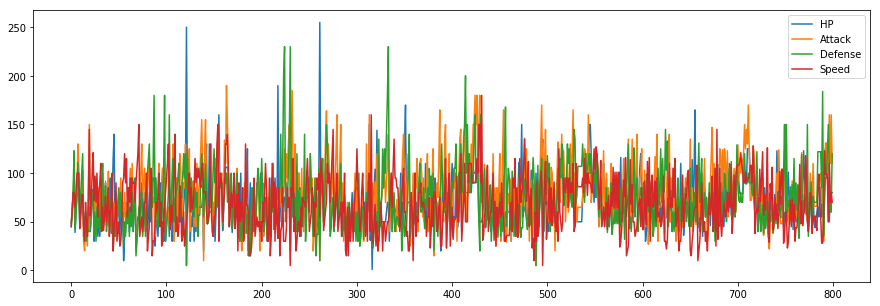

In [49]:
# Plotting all data 
data1 = data.loc[:,["HP","Attack","Defense","Speed"]]
data1.plot(figsize=(15, 5))
# it is confusing

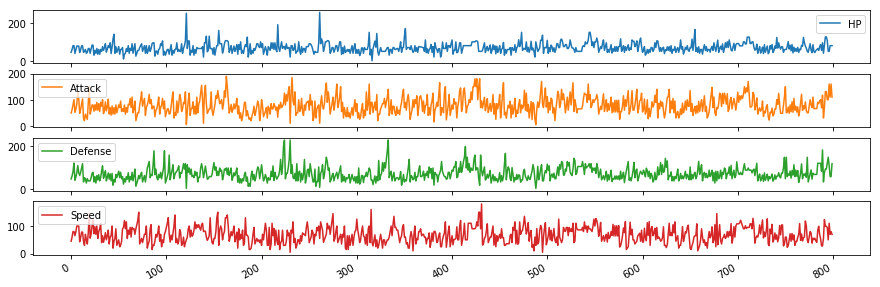

In [50]:
# subplots
data1.plot(subplots = True, figsize=(15, 5))
plt.show()

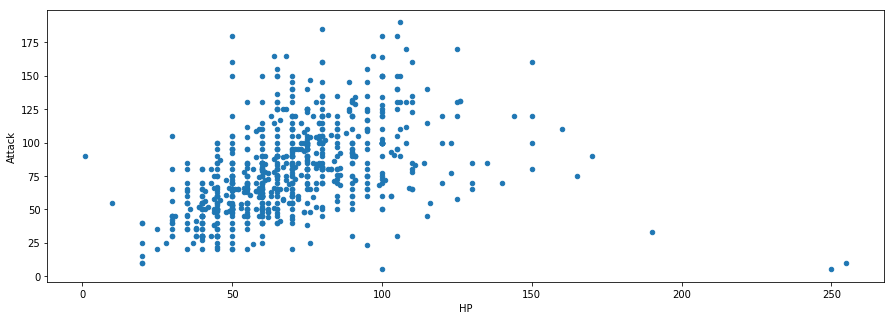

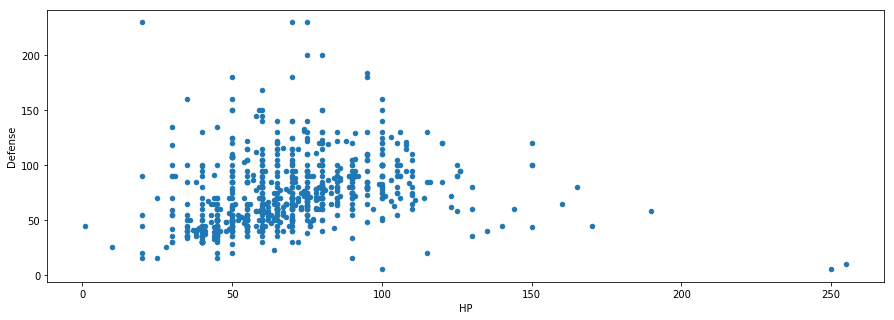

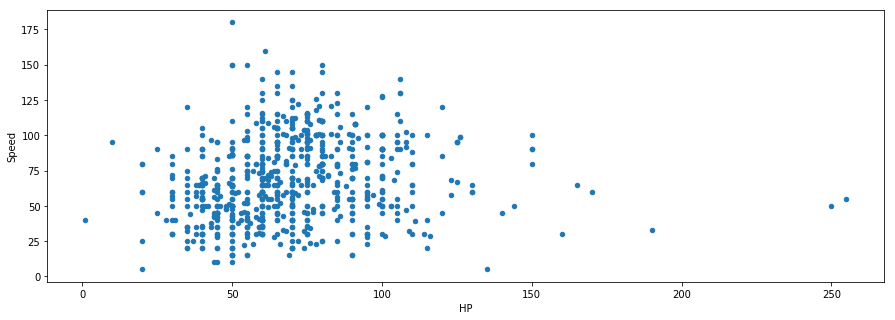

In [54]:
# scatter plot  
data1.plot(kind = "scatter",x="HP",y="Attack", figsize=(15, 5))
data1.plot(kind = "scatter",x="HP",y="Defense", figsize=(15, 5))
data1.plot(kind = "scatter",x="HP",y="Speed", figsize=(15, 5))
plt.show()

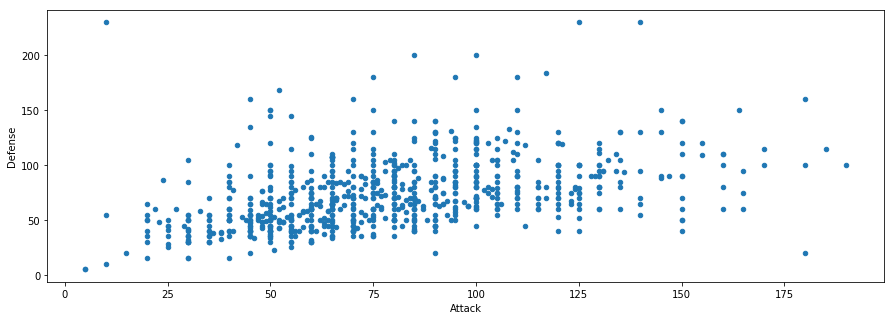

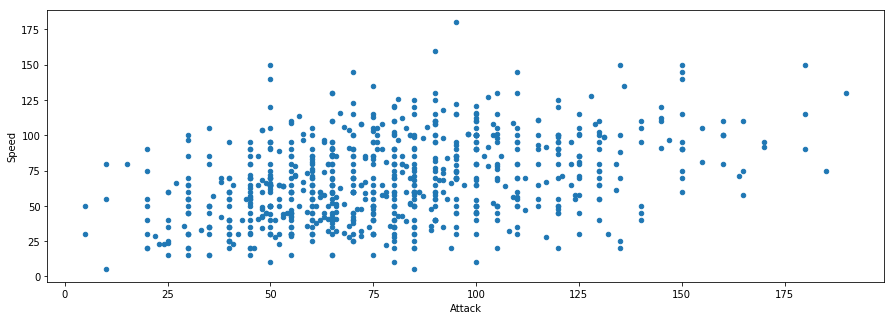

In [55]:
data1.plot(kind = "scatter",x="Attack",y="Defense", figsize=(15, 5))
data1.plot(kind = "scatter",x="Attack",y="Speed", figsize=(15, 5))
plt.show()

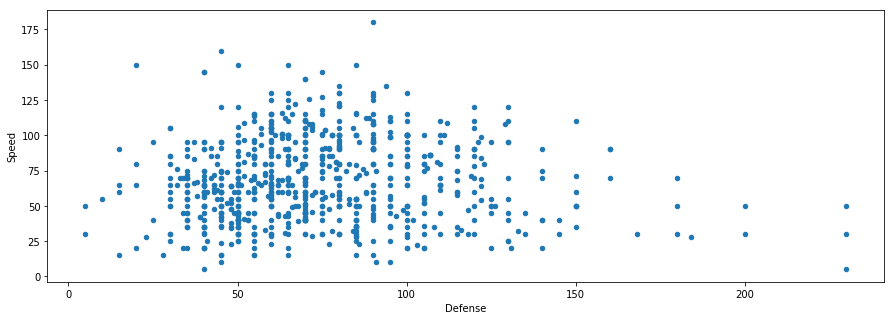

In [57]:
data1.plot(kind = "scatter",x="Defense",y="Speed", figsize=(15, 5))
plt.show()

# HIERARCHICAL INDEXING
Setting indexing

In [58]:
# Setting index : type 1 is outer type 2 is inner index
data1 = data.set_index(["Type 1","Type 2"]) 
data1.head(100)
# data1.loc["Fire","Flying"] # howw to use indexes

Name   HP  Attack  Defense  Sp. Atk  Sp. Def  \
Type 1   Type 2                                                              
Grass    Poison          Bulbasaur   45      49       49       65       65   
         Poison            Ivysaur   60      62       63       80       80   
         Poison           Venusaur   80      82       83      100      100   
         Poison      Mega Venusaur   80     100      123      122      120   
Fire     NaN            Charmander   39      52       43       60       50   
         NaN            Charmeleon   58      64       58       80       65   
         Flying          Charizard   78      84       78      109       85   
         Dragon   Mega Charizard X   78     130      111      130       85   
         Flying   Mega Charizard Y   78     104       78      159      115   
Water    NaN              Squirtle   44      48       65       50       64   
         NaN             Wartortle   59      63       80       65       80   
         NaN             Blastoise   79      83      100       85      105   
         NaN        Mega Blastoise   79     103      120      135      115   
Bug      NaN              Caterpie   45      30       35       20       20   
         NaN               Metapod   50      20       55       25       25   
         Flying         Butterfree   60      45       50       90       80   
         Poison             Weedle   40      35       30       20       20   
         Poison             Kakuna   45      25       50       25       25   
         Poison           Beedrill   65      90       40       45       80   
         Poison      Mega Beedrill   65     150       40       15       80   
Normal   Flying             Pidgey   40      45       40       35       35   
         Flying          Pidgeotto   63      60       55       50       50   
         Flying            Pidgeot   83      80       75       70       70   
         Flying       Mega Pidgeot   83      80       80      135       80   
         NaN               Rattata   30      56       35       25       35   
         NaN              Raticate   55      81       60       50       70   
         Flying            Spearow   40      60       30       31       31   
         Flying             Fearow   65      90       65       61       61   
Poison   NaN                 Ekans   35      60       44       40       54   
         NaN                 Arbok   60      85       69       65       79   
...                            ...  ...     ...      ...      ...      ...   
Psychic  NaN              Alakazam   55      50       45      135       95   
         NaN         Mega Alakazam   55      50       65      175       95   
Fighting NaN                Machop   70      80       50       35       35   
         NaN               Machoke   80     100       70       50       60   
         NaN               Machamp   90     130       80       65       85   
Grass    Poison         Bellsprout   50      75       35       70       30   
         Poison         Weepinbell   65      90       50       85       45   
         Poison         Victreebel   80     105       65      100       70   
Water    Poison          Tentacool   40      40       35       50      100   
         Poison         Tentacruel   80      70       65       80      120   
Rock     Ground            Geodude   40      80      100       30       30   
         Ground           Graveler   55      95      115       45       45   
         Ground              Golem   80     120      130       55       65   
Fire     NaN                Ponyta   50      85       55       65       65   
         NaN              Rapidash   65     100       70       80       80   
Water    Psychic          Slowpoke   90      65       65       40       40   
         Psychic           Slowbro   95      75      110      100       80   
         Psychic      Mega Slowbro   95      75      180      130       80   
Electric Steel           Magnemite   25      35     